# Price Level Histories 

This lecture offers some historical evidence about fluctuations in levels of aggregate price indexes.  

Let's start by installing the necessary Python packages.

The `xlrd` package is used by `pandas` to perform operations on Excel files.

In [1]:
!pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 4.7 MB/s eta 0:00:00


<!-- Check for pandas>=2.1.4 for Google Collab Compat -->

In [2]:
from importlib.metadata import version
from packaging.version import Version

if Version(version("pandas")) < Version('2.1.4'):
    !pip install "pandas>=2.1.4"

We can then import the Python modules we will use.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

The rate of growth of the price level is called **inflation** in the popular press and in discussions among central bankers and treasury officials.

The price level is measured in units of domestic currency per units of a representative bundle of consumption goods.  

Thus, in the US, the price level at $t$ is measured in dollars (month $t$ or year $t$) per unit of the consumption bundle.

Until the early 20th century, in many western economies, price levels fluctuated from year to year but didn't have much of a trend.  

Often the price levels ended a century near where they started.

Things were different in the 20th century, as we shall see in this lecture.

A widely believed explanation of this big difference is that countries' abandoning gold and silver standards in the early twentieth century. 

```{tip}
This lecture sets the stage for some subsequent lectures about a theory that macro economists use to think about determinants of the price level, namely, {doc}`cagan_ree` and {doc}`cagan_adaptive`
```

## Four centuries of price levels

We begin by displaying data that originally appeared on page 35 of {cite}`sargent2002big` that show price levels for four "hard currency" countries from 1600 to 1914.

* France 
* Spain (Castile)
* United Kingdom
* United States

In the present context, the  phrase "hard currency" means that the countries were on a commodity-money standard:  money consisted of gold and silver coins that circulated at values largely determined by the weights of their gold and silver contents.

```{note}
Under a gold or silver standard, some money also consisted of "warehouse certificates" that represented paper claims on gold or silver coins. Bank notes issued by the government or private banks can be viewed as examples of such "warehouse certificates".
```

Let us bring the data into pandas from a spreadsheet that is [hosted on github](https://github.com/QuantEcon/lecture-python-intro/tree/main/lectures/datasets).

In [4]:
# Import data and clean up the index
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/longprices.xls"
df_fig5 = pd.read_excel(data_url, 
                        sheet_name='all', 
                        header=2, 
                        index_col=0).iloc[1:]
df_fig5.index = df_fig5.index.astype(int)

We first plot price levels over the period 1600-1914.

During most years in this time interval, the countries were on a gold or silver standard.

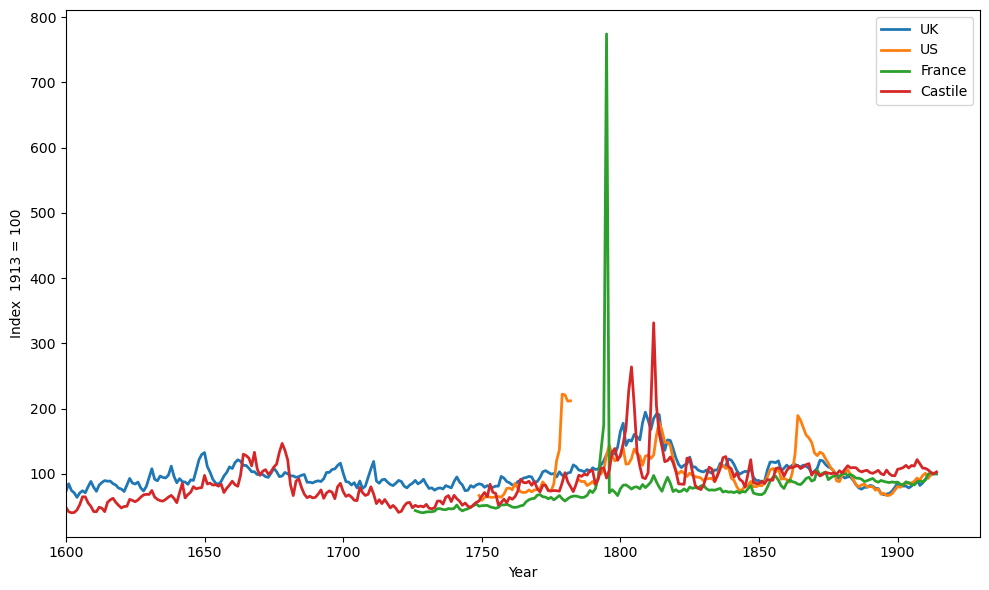

In [5]:
df_fig5_befe1914 = df_fig5[df_fig5.index <= 1914]

# Create plot
cols = ['UK', 'US', 'France', 'Castile']

fig, ax = plt.subplots(figsize=(10,6))

for col in cols:
    ax.plot(df_fig5_befe1914.index, 
            df_fig5_befe1914[col], label=col, lw=2)

ax.legend()
ax.set_ylabel('Index  1913 = 100')
ax.set_xlabel('Year')
ax.set_xlim(xmin=1600)
plt.tight_layout()
plt.show()

We say "most years" because there were temporary lapses from the gold or silver standard.

By staring at {numref}`lrpl` carefully, you might be able to guess when these temporary lapses occurred, because they were also times during which price levels temporarily rose markedly:

* 1791-1797 in France (French Revolution)
* 1776-1790 in the US (War for Independence from Great Britain)
* 1861-1865 in the US (Civil War)

During these episodes, the gold/silver standard was temporarily abandoned when a government printed paper money to pay for war expenditures.

```{note}
This quantecon lecture {doc}`french_rev` describes circumstances leading up to and during the big inflation that occurred during the French Revolution.
```

Despite these temporary lapses, a striking thing about the figure is that price levels were roughly constant over three centuries.  

In the early century, two other features of this data attracted the attention of [Irving Fisher](https://en.wikipedia.org/wiki/Irving_Fisher) of Yale University and [John Maynard Keynes](https://en.wikipedia.org/wiki/John_Maynard_Keynes) of Cambridge University.

* Despite being anchored to the same average level over long time spans, there were considerable year-to-year variations in price levels
* While using valuable gold and silver as coins succeeded in anchoring the price level by limiting the supply of money, it cost real resources.
* a country paid a high "opportunity cost" for using gold and silver coins as money -- that gold and silver could instead have been made into valuable jewelry and other durable goods. 

Keynes and Fisher proposed what they claimed would be a more efficient way to achieve a price level that 

*  would be at least as firmly anchored as achieved under a gold or silver standard, and
*  would also exhibit less year-to-year short-term fluctuations.  

They said that central bank could achieve price level stability by

* issuing  **limited supplies** of paper currency
* refusing to print money to finance government expenditures

This logic prompted John Maynard Keynes to call a commodity standard a "barbarous relic."

A paper currency or "fiat money" system disposes of all reserves behind a currency. 

But adhering to a gold or silver standard had provided an automatic mechanism for limiting the supply of money, thereby anchoring the price level.

To anchor the price level, a pure paper or fiat money system replaces that automatic mechanism with a central bank with the authority and determination to limit the supply of money (and to deter counterfeiters!) 

Now let's see what happened to the price level in the four countries after 1914, when one after another of them left the gold/silver standard by showing the complete graph that originally appeared on page 35 of {cite}`sargent2002big`.

{numref}`lrpl_lg` shows the logarithm of price levels over four "hard currency" countries from 1600 to 2000.

```{note}
Although we didn't have to use logarithms in our earlier graphs that had stopped in 1914, we now choose to use logarithms because we want to fit observations after 1914 in the same graph as the earlier observations.
```

After the outbreak of the Great War in 1914, the four countries left the gold standard and in so doing acquired the ability to print money to finance government expenditures.

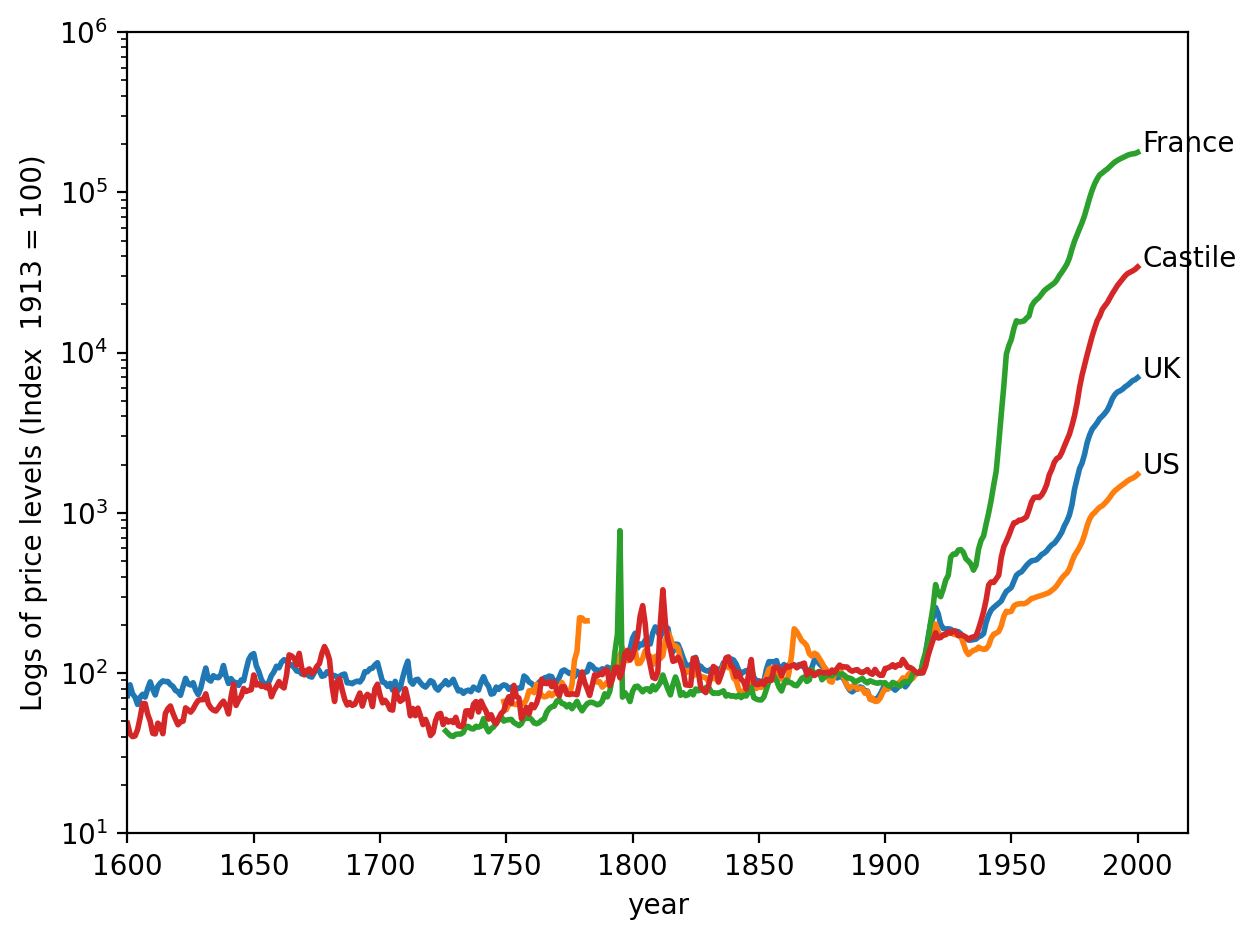

In [6]:
fig, ax = plt.subplots(dpi=200)

for col in cols:
    ax.plot(df_fig5.index, df_fig5[col], lw=2)
    ax.text(x=df_fig5.index[-1]+2, 
            y=df_fig5[col].iloc[-1], s=col)

ax.set_yscale('log')
ax.set_ylabel('Logs of price levels (Index  1913 = 100)')
ax.set_ylim([10, 1e6])
ax.set_xlabel('year')
ax.set_xlim(xmin=1600)
plt.tight_layout()
plt.show()

{numref}`lrpl_lg` shows that paper-money-printing central banks didn't do as well as the gold and standard silver standard in anchoring price levels.

That would probably have surprised or disappointed Irving Fisher and John Maynard Keynes.

Actually, earlier economists and statesmen knew about the possibility of fiat money systems long before Keynes and Fisher advocated them in the early 20th century.

Proponents of a commodity money system did not trust governments and central banks properly to manage a fiat money system.

They were willing to pay the resource costs associated with setting up and maintaining a commodity money system.

In light of the high and persistent inflation that many countries experienced after they abandoned commodity monies in the twentieth century, we hesitate to criticize advocates of a gold or silver standard for their preference to stay on the pre-1914 gold/silver standard. 

The breadth and lengths of the inflationary experiences of the twentieth century under paper money fiat standards are historically unprecedented.

## Four big inflations

In the wake of World War I, which ended in November 1918, monetary and fiscal authorities struggled to achieve price level stability without being on a gold or silver standard.

We present four graphs from "The Ends of Four Big Inflations" from chapter 3 of {cite}`sargent2013rational`.

The graphs depict logarithms of price levels during the early post World War I years for four countries:

* Figure 3.1, Retail prices Austria, 1921-1924 (page 42)
* Figure 3.2, Wholesale prices Hungary, 1921-1924 (page 43)
* Figure 3.3, Wholesale prices, Poland, 1921-1924 (page 44)
* Figure 3.4, Wholesale prices, Germany, 1919-1924 (page 45)

We have added logarithms of the exchange rates vis-&agrave;-vis the US dollar to each of the four graphs
from chapter 3 of {cite}`sargent2013rational`.

Data underlying our graphs appear in tables in an appendix to chapter 3 of {cite}`sargent2013rational`.
We have transcribed all of these data into a spreadsheet {download}`chapter_3.xlsx <https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/chapter_3.xlsx>` that we read into pandas.

In the code cell below we clean the data and build a `pandas.dataframe`.

In [7]:
def process_entry(entry):
    "Clean each entry of a dataframe."
    
    if type(entry) == str:
        # Remove leading and trailing whitespace
        entry = entry.strip()
        # Remove comma
        entry = entry.replace(',', '')
    
        # Remove HTML markers
        item_to_remove = ['<s>a</s>', '<s>c</s>', 
                          '<s>d</s>', '<s>e</s>']

        # <s>b</s> represents a billion
        if '<s>b</s>' in entry:
            entry = entry.replace('<s>b</s>', '')
            entry = float(entry) * 1e9
        else:
            for item in item_to_remove:
                if item in entry:
                    entry = entry.replace(item, '')
    return entry

def process_df(df):
    "Clean and reorganize the entire dataframe."
    
    # Remove HTML markers from column names
    for item in ['<s>a</s>', '<s>c</s>', '<s>d</s>', '<s>e</s>']:
        df.columns = df.columns.str.replace(item, '')
        
    # Convert years to int
    df['Year'] = df['Year'].apply(lambda x: int(x))
    
    # Set index to datetime with year and month
    df = df.set_index(
            pd.to_datetime(
                (df['Year'].astype(str) + \
                 df['Month'].astype(str)), 
                format='%Y%B'))
    df = df.drop(['Year', 'Month'], axis=1)
    
    # Handle duplicates by keeping the first
    df = df[~df.index.duplicated(keep='first')]
    
    # Convert attribute values to numeric
    df = df.map(lambda x: float(x) \
                if x != '—' else np.nan)
    
    # Finally, we only focus on data between 1919 and 1925
    mask = (df.index >= '1919-01-01') & \
           (df.index < '1925-01-01')
    df = df.loc[mask]

    return df

Now we write plotting functions `pe_plot` and `pr_plot` that will build figures that show the price level, exchange rates, 
and inflation rates, for each country of interest.

In [8]:
def pe_plot(p_seq, e_seq, index, labs, ax):
    "Generate plots for price and exchange rates."

    p_lab, e_lab = labs
    
    # Plot price and exchange rates
    ax.plot(index, p_seq, label=p_lab, color='tab:blue', lw=2)
    
    # Add a new axis
    ax1 = ax.twinx()
    ax1.plot([None], [None], label=p_lab, color='tab:blue', lw=2)
    ax1.plot(index, e_seq, label=e_lab, color='tab:orange', lw=2)
    
    # Set log axes
    ax.set_yscale('log')
    ax1.set_yscale('log')
    
    # Define the axis label format
    ax.xaxis.set_major_locator(
        mdates.MonthLocator(interval=5))
    ax.xaxis.set_major_formatter(
        mdates.DateFormatter('%b %Y'))
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    
    # Set labels
    ax.set_ylabel('Price level')
    ax1.set_ylabel('Exchange rate')
  
    ax1.legend(loc='upper left')
    
    return ax1

def pr_plot(p_seq, index, ax):
    "Generate plots for inflation rates."

    #  Calculate the difference of log p_seq
    log_diff_p = np.diff(np.log(p_seq))
    
    # Calculate and plot moving average
    diff_smooth = pd.DataFrame(log_diff_p).rolling(3, center=True).mean()
    ax.plot(index[1:], diff_smooth, label='Moving average (3 period)', alpha=0.5, lw=2)
    ax.set_ylabel('Inflation rate')
    
    ax.xaxis.set_major_locator(
        mdates.MonthLocator(interval=5))
    ax.xaxis.set_major_formatter(
        mdates.DateFormatter('%b %Y'))
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    
    ax.legend()
    
    return ax

We prepare the data for each country

In [9]:
# Import data
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/chapter_3.xlsx"
xls = pd.ExcelFile(data_url)

# Select relevant sheets
sheet_index = [(2, 3, 4), 
               (9, 10), 
               (14, 15, 16), 
               (21, 18, 19)]

# Remove redundant rows
remove_row = [(-2, -2, -2), 
              (-7, -10), 
              (-6, -4, -3), 
              (-19, -3, -6)]

# Unpack and combine series for each country
df_list = []

for i in range(4):
    
    indices, rows = sheet_index[i], remove_row[i]
    
    # Apply process_entry on the selected sheet
    sheet_list = [
        pd.read_excel(xls, 'Table3.' + str(ind), 
            header=1).iloc[:row].map(process_entry)
        for ind, row in zip(indices, rows)]
    
    sheet_list = [process_df(df) for df in sheet_list]
    df_list.append(pd.concat(sheet_list, axis=1))

df_aus, df_hun, df_pol, df_deu = df_list

Now let's construct graphs for our four countries.

For each country, we'll plot two graphs.

The first graph plots logarithms of 

* price levels
* exchange rates vis-&agrave;-vis US dollars

For each country, the scale on the right side of a graph will pertain to the price level while the scale on the left side of a graph will pertain to the exchange rate. 

For each country, the second graph plots a centered three-month moving average of the inflation rate defined as $\frac{p_{t-1} + p_t + p_{t+1}}{3}$.

### Austria

The sources of our data are:

* Table 3.3, retail price level $\exp p$
* Table 3.4, exchange rate with US

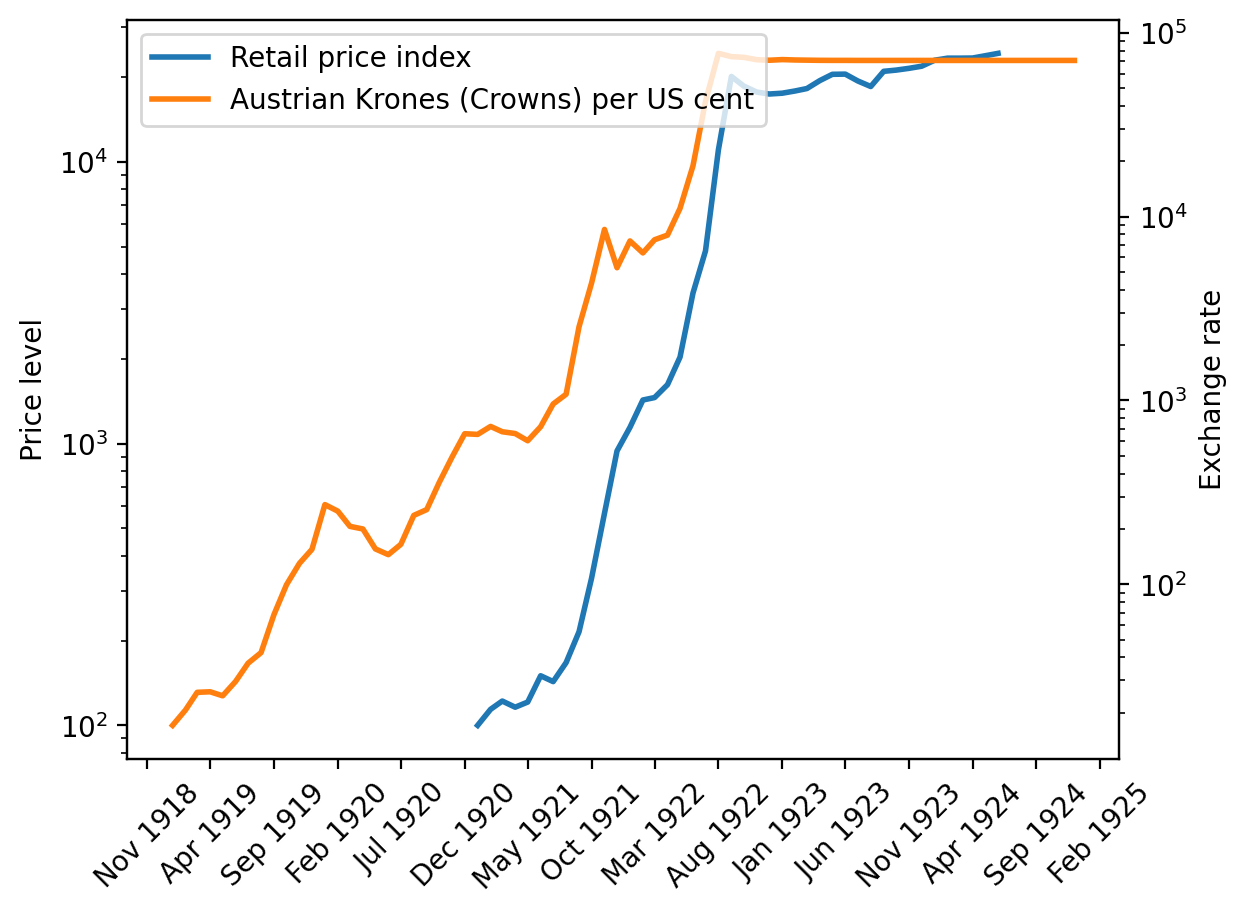

In [10]:
p_seq = df_aus['Retail price index, 52 commodities']
e_seq = df_aus['Exchange Rate']

lab = ['Retail price index', 
       'Austrian Krones (Crowns) per US cent']

# Create plot
fig, ax = plt.subplots(dpi=200)
_ = pe_plot(p_seq, e_seq, df_aus.index, lab, ax)

plt.show()

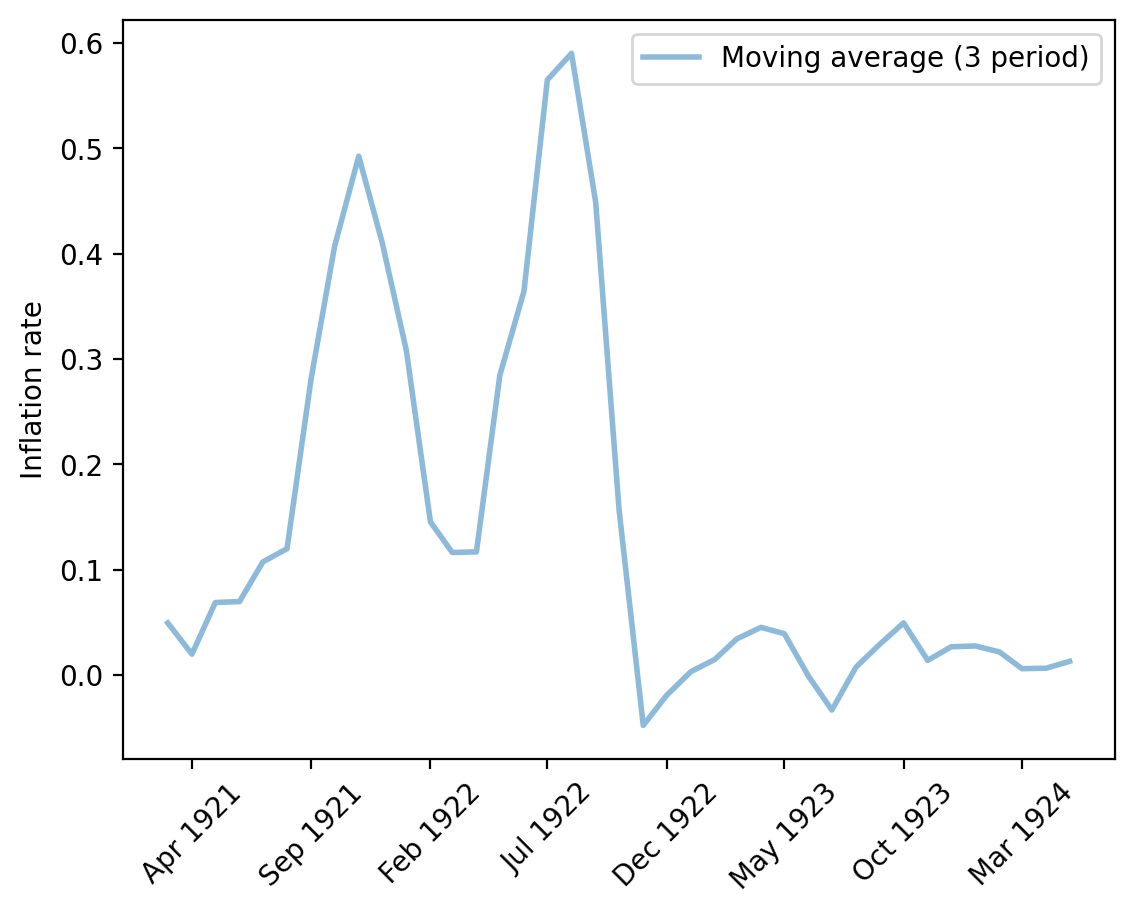

In [11]:
# Plot moving average
fig, ax = plt.subplots(dpi=200)
_ = pr_plot(p_seq, df_aus.index, ax)

plt.show()

Staring at {numref}`pi_xrate_austria` and {numref}`inflationrate_austria` conveys the following impressions to the authors of this lecture at QuantEcon.

* an episode of "hyperinflation" with rapidly rising log price level and very high monthly inflation rates
* a sudden stop of the hyperinflation as indicated by the abrupt flattening of the log price level and a marked permanent drop in the three-month average of inflation
* a US dollar exchange rate that shadows the price level.  
  
We'll see similar patterns in the next three episodes that we'll study now.

### Hungary

The source of our data for Hungary is:

* Table 3.10, price level $\exp p$ and exchange rate

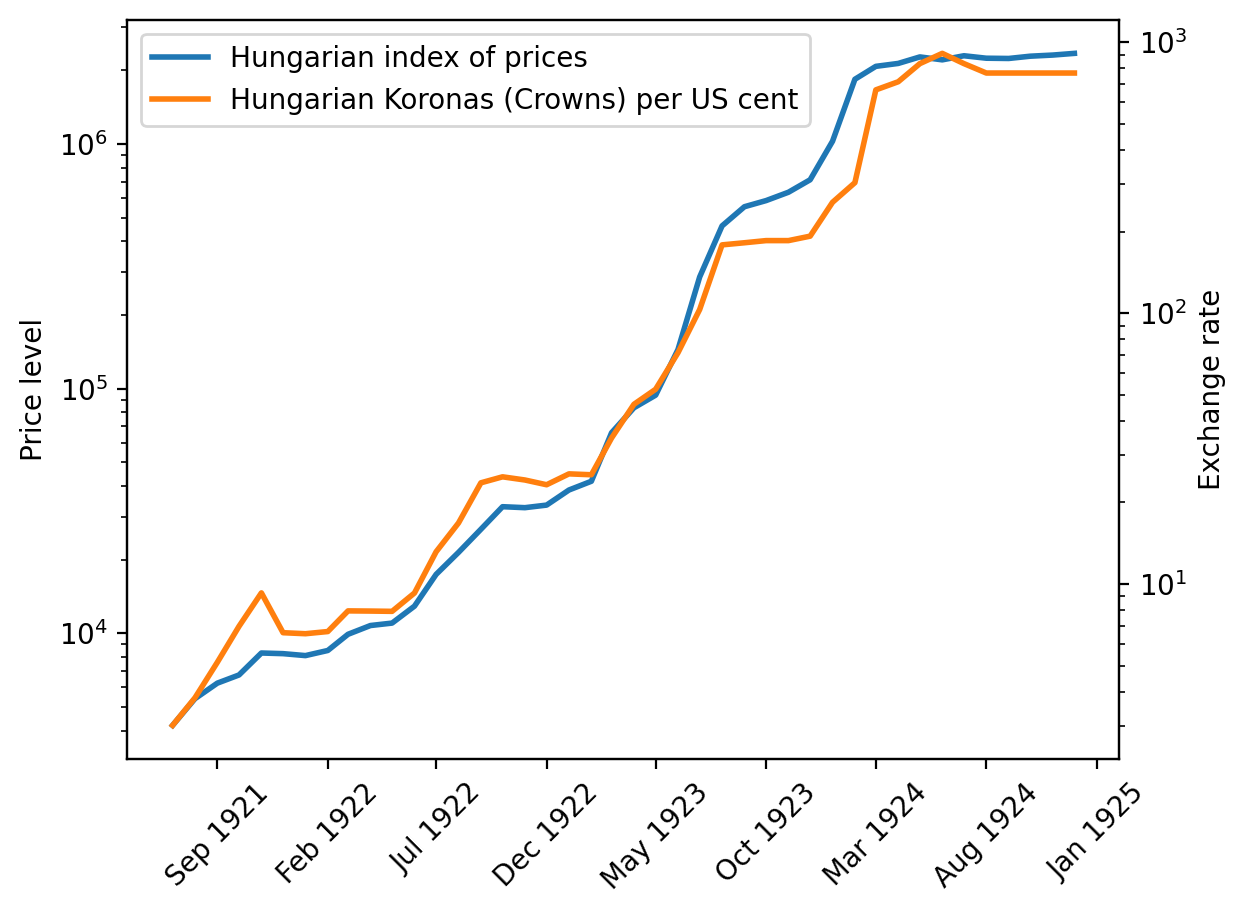

In [12]:
p_seq = df_hun['Hungarian index of prices']
e_seq = 1 / df_hun['Cents per crown in New York']

lab = ['Hungarian index of prices', 
       'Hungarian Koronas (Crowns) per US cent']

# Create plot
fig, ax = plt.subplots(dpi=200)
_ = pe_plot(p_seq, e_seq, df_hun.index, lab, ax)

plt.show()

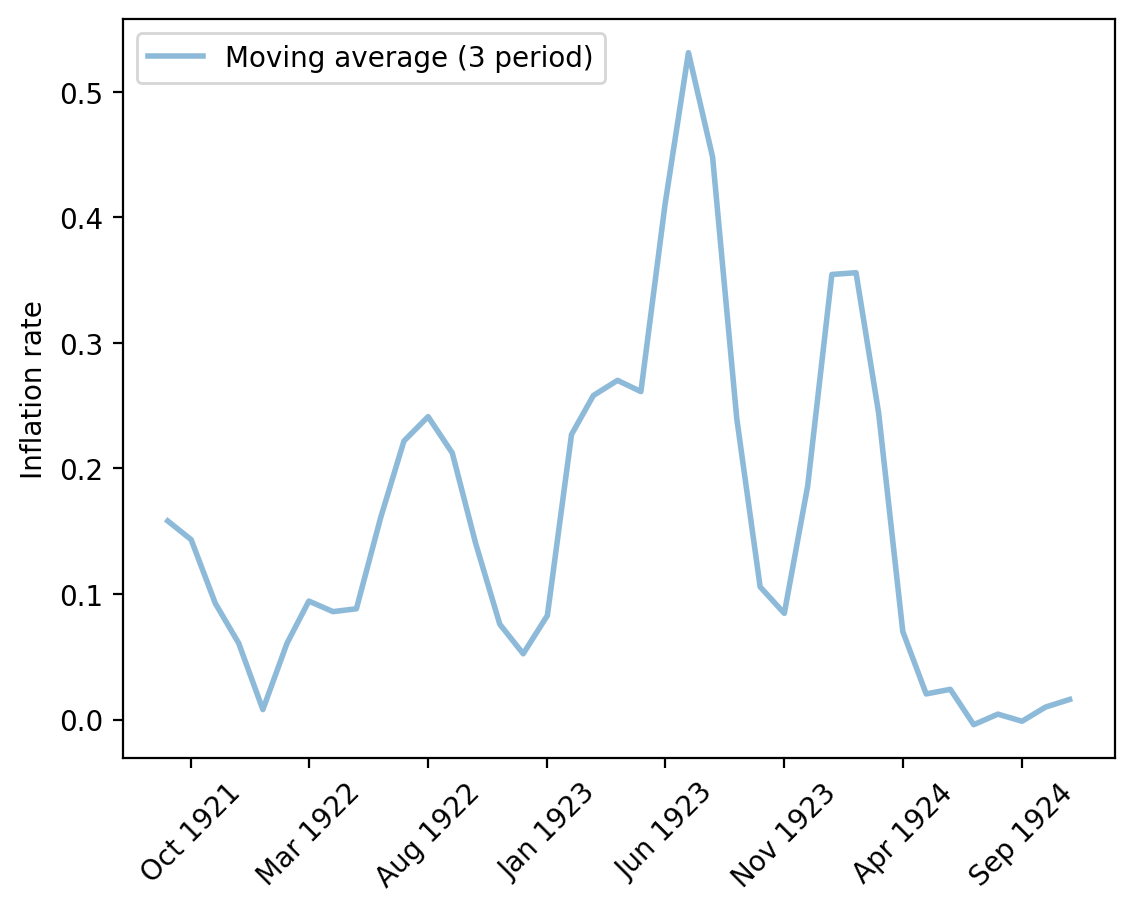

In [13]:
# Plot moving average
fig, ax = plt.subplots(dpi=200)
_ = pr_plot(p_seq, df_hun.index, ax)

plt.show()

### Poland

The sources of our data for Poland are:

* Table 3.15, price level $\exp p$ 
* Table 3.15, exchange rate

```{note}
To construct the price level series from the data in the spreadsheet, we instructed Pandas to follow the same procedures implemented in chapter 3 of {cite}`sargent2013rational`. We spliced together three series - Wholesale price index, Wholesale Price Index: On paper currency basis, and Wholesale Price Index: On zloty basis. We adjusted the sequence based on the price level ratio at the last period of the available previous series and glued them  to construct a single series.
We dropped the exchange rate after June 1924, when the zloty was adopted. We did this because we don't have the price measured in zloty. We used the old currency in June to compute the exchange rate adjustment.
```

In [14]:
# Splice three price series in different units
p_seq1 = df_pol['Wholesale price index'].copy()
p_seq2 = df_pol['Wholesale Price Index: '
                'On paper currency basis'].copy()
p_seq3 = df_pol['Wholesale Price Index: ' 
                'On zloty basis'].copy()

# Non-nan part
mask_1 = p_seq1[~p_seq1.isna()].index[-1]
mask_2 = p_seq2[~p_seq2.isna()].index[-2]

adj_ratio12 = (p_seq1[mask_1] / p_seq2[mask_1])
adj_ratio23 = (p_seq2[mask_2] / p_seq3[mask_2])

# Glue three series
p_seq = pd.concat([p_seq1[:mask_1], 
                   adj_ratio12 * p_seq2[mask_1:mask_2], 
                   adj_ratio23 * p_seq3[mask_2:]])
p_seq = p_seq[~p_seq.index.duplicated(keep='first')]

# Exchange rate
e_seq = 1/df_pol['Cents per Polish mark (zloty after May 1924)']
e_seq[e_seq.index > '05-01-1924'] = np.nan

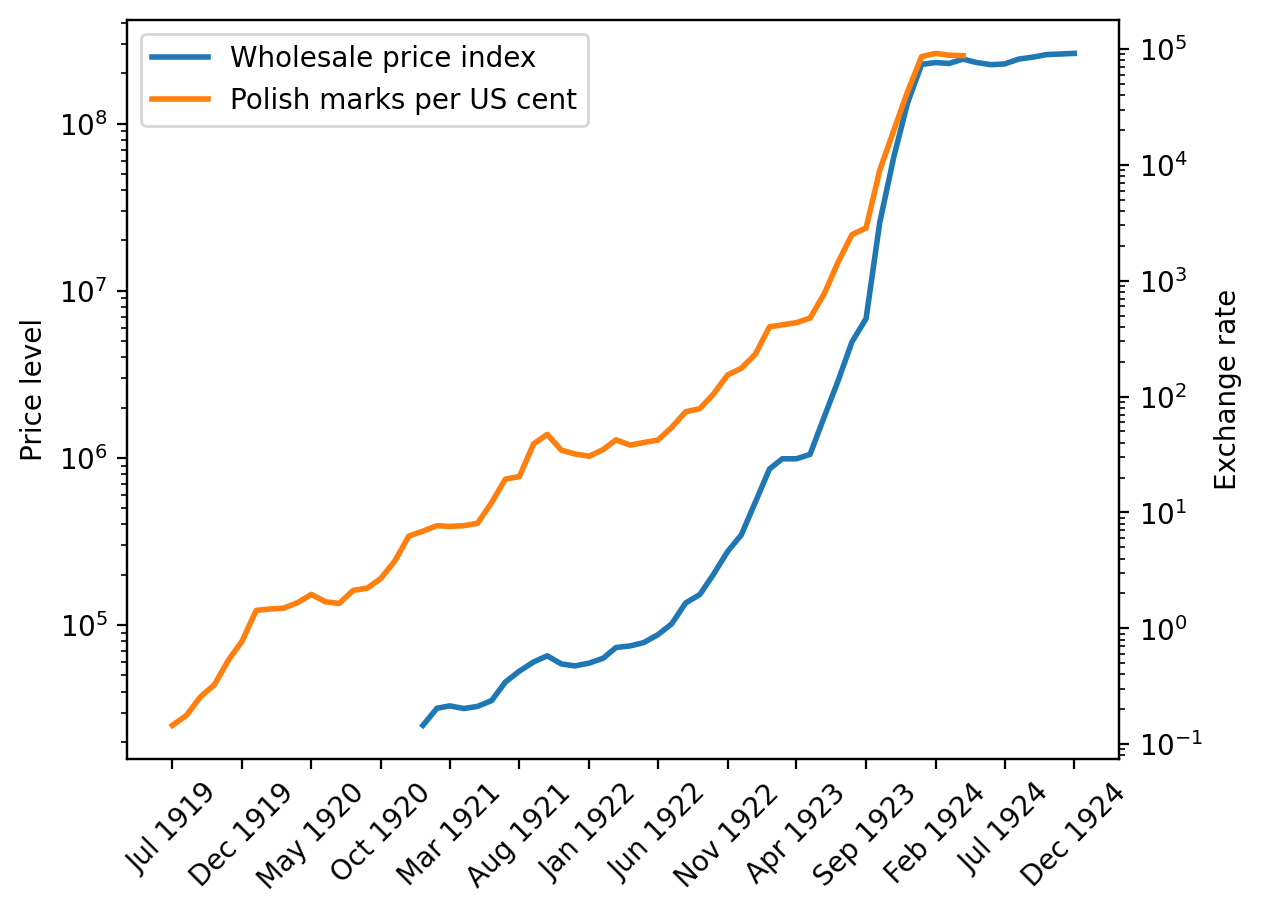

In [15]:
lab = ['Wholesale price index', 
       'Polish marks per US cent']

# Create plot
fig, ax = plt.subplots(dpi=200)
ax1 = pe_plot(p_seq, e_seq, df_pol.index, lab, ax)

plt.show()

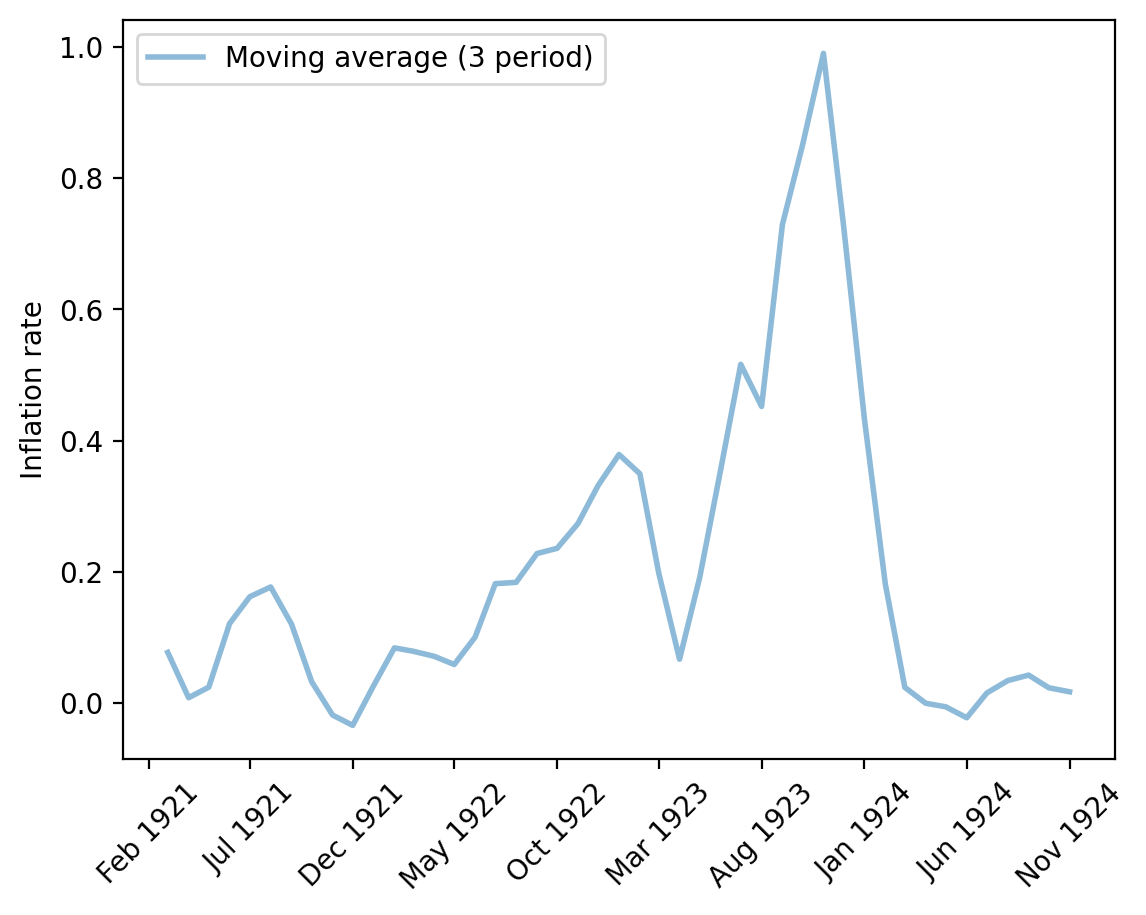

In [16]:
# Plot moving average
fig, ax = plt.subplots(dpi=200)
_ = pr_plot(p_seq, df_pol.index, ax)

plt.show()

### Germany

The sources of our data for Germany are the following tables from chapter 3 of {cite}`sargent2013rational`:

* Table 3.18, wholesale price level $\exp p$ 
* Table 3.19, exchange rate

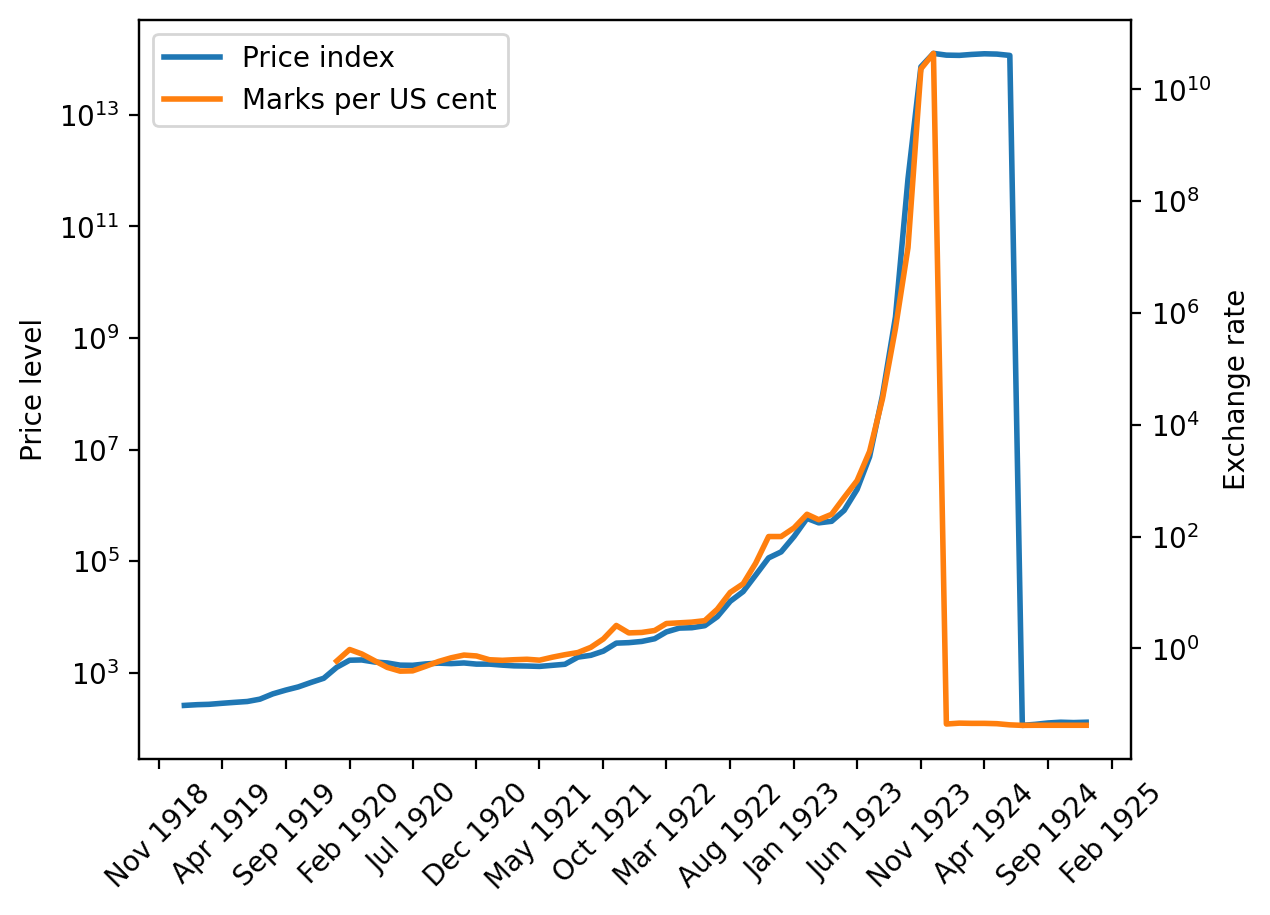

In [17]:
p_seq = df_deu['Price index (on basis of marks before July 1924,'
                '  reichsmarks after)'].copy()
e_seq = 1/df_deu['Cents per mark']

lab = ['Price index', 
       'Marks per US cent']

# Create plot
fig, ax = plt.subplots(dpi=200)
ax1 = pe_plot(p_seq, e_seq, df_deu.index, lab, ax)

plt.show()

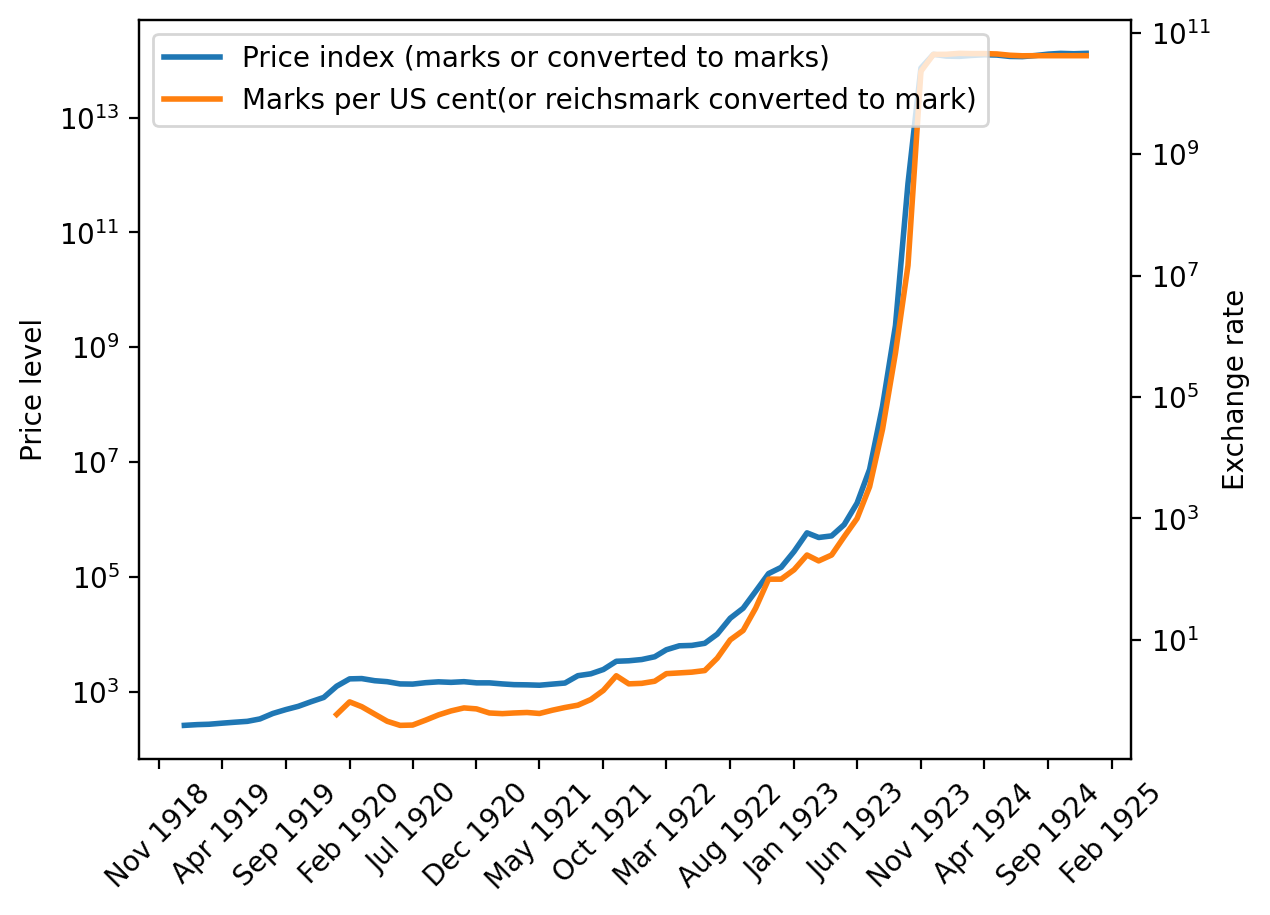

In [18]:
p_seq = df_deu['Price index (on basis of marks before July 1924,'
                '  reichsmarks after)'].copy()
e_seq = 1/df_deu['Cents per mark'].copy()

# Adjust the price level/exchange rate after the currency reform
p_seq[p_seq.index > '06-01-1924'] = p_seq[p_seq.index 
                                          > '06-01-1924'] * 1e12
e_seq[e_seq.index > '12-01-1923'] = e_seq[e_seq.index 
                                          > '12-01-1923'] * 1e12

lab = ['Price index (marks or converted to marks)', 
       'Marks per US cent(or reichsmark converted to mark)']

# Create plot
fig, ax = plt.subplots(dpi=200)
ax1 = pe_plot(p_seq, e_seq, df_deu.index, lab, ax)

plt.show()

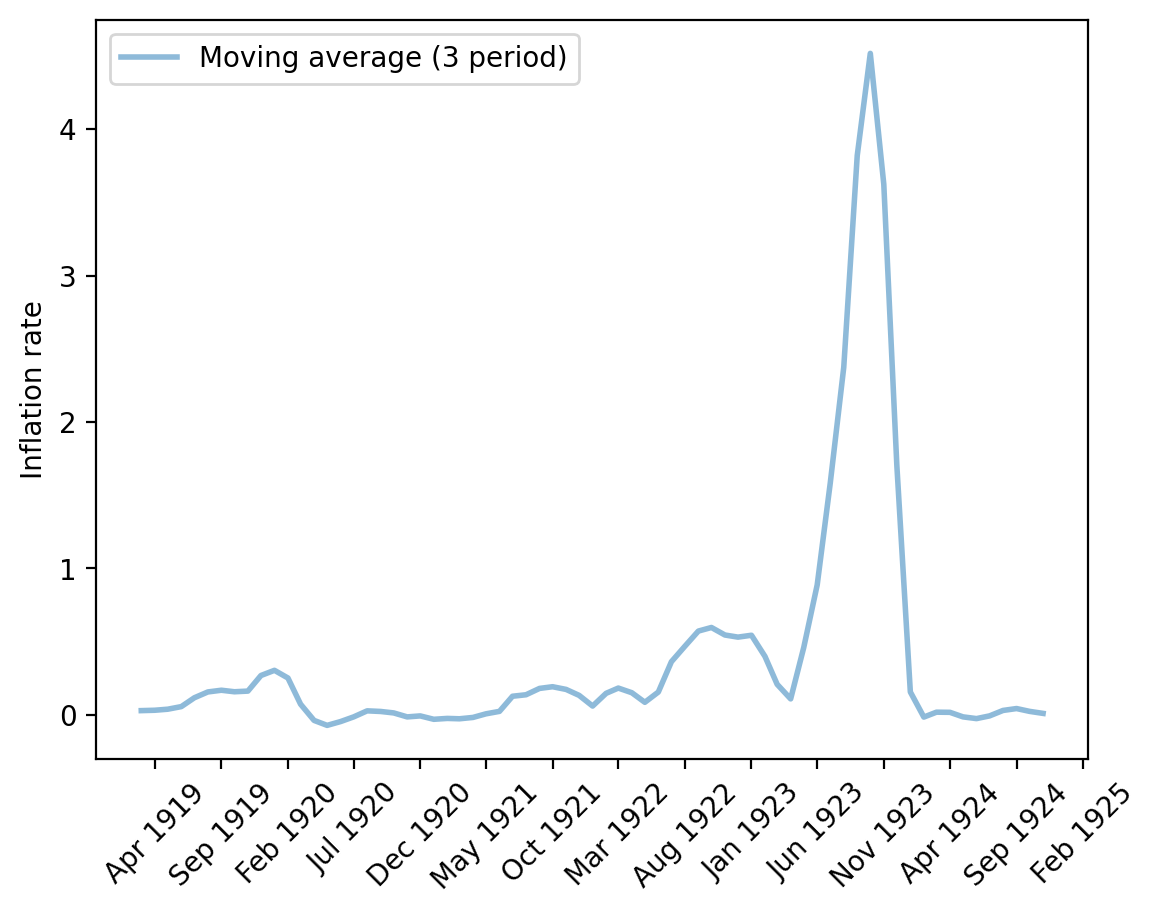

In [19]:
# Plot moving average
fig, ax = plt.subplots(dpi=200)
_ = pr_plot(p_seq, df_deu.index, ax)

plt.show()

## Starting and stopping big inflations

It is striking how *quickly* (log) price levels in Austria, Hungary, Poland, and Germany leveled off after rising so quickly.

These "sudden stops" are also revealed by the permanent drops in three-month moving averages of inflation for the four countries plotted above.

In addition, the US dollar exchange rates for each of the four countries shadowed their price levels. 

```{note}
This pattern is an instance of a force featured in the [purchasing power parity](https://en.wikipedia.org/wiki/Purchasing_power_parity) theory of exchange rates. 
```

Each of these big inflations seemed to have "stopped on a dime".

Chapter 3 of {cite}`sargent2002big` offers an explanation for this remarkable pattern.

In a nutshell, here is the explanation offered there.

After World War I, the United States was on a gold standard. 

The US government stood ready to convert a dollar into a specified amount of gold on demand.

Immediately after World War I, Hungary, Austria, Poland, and Germany were not on the gold standard. 

Their currencies were "fiat" or "unbacked", meaning that they were not backed by credible government promises to convert them into gold or silver coins on demand.

The governments printed new paper notes to pay for goods and services. 

```{note}
Technically the notes were "backed" mainly by treasury bills. But people could not expect that those treasury bills would be paid off by levying taxes, but instead by printing more notes or treasury bills.
```

This was done on such a scale that it led to a depreciation of the currencies of spectacular proportions. 
 
In the end, the German mark stabilized at 1 trillion ($10^{12}$) paper marks to the prewar gold mark, the Polish mark at 1.8 million paper marks to the gold zloty, the Austrian crown at 14,400 paper crowns to the prewar Austro-Hungarian crown, and the Hungarian krone at 14,500 paper crowns to the prewar Austro-Hungarian crown.

Chapter 3 of {cite}`sargent2002big`  described deliberate changes in policy that Hungary, Austria, Poland, and Germany made to end their hyperinflations.

Each government stopped printing money to pay for goods and services once again and made its currency convertible to the US dollar or the UK pound.

The story told in {cite}`sargent2002big` is grounded in a *monetarist theory of the price level* described in {doc}`cagan_ree` and {doc}`cagan_adaptive`.

Those lectures discuss theories about what owners of those rapidly depreciating currencies were thinking and how their beliefs shaped responses of inflation to government monetary and fiscal policies.